In [2]:
# Install YOLOv8 (Ultralytics)
!pip install -q ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 25.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 whic

In [3]:
# Import required libraries
from ultralytics import YOLO
import os
import shutil
from IPython.display import Image, display


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Create a YOLOv8 dataset config file for vehicle detection
dataset_yaml = """
path: /kaggle/input/vehicle-dataset/output
train: /kaggle/input/vehicle-dataset/output/train
val: /kaggle/input/vehicle-dataset/output/val

nc: 15 
names: ['truck', 'person', 'traffic sign', 'rider', 'car', 'motorcycle', 'animal', 'bicycle', 'vehicle fallback', 'caravan', 'autorickshaw', 'train', 'traffic light', 'bus', 'trailer']

"""

# Save the dataset config file as 'vehicle.yaml'
with open("vehicle.yaml", "w") as f:
    f.write(dataset_yaml)

# Verify the content of the YAML file to ensure it's correct
!cat vehicle.yaml



path: /kaggle/input/vehicle-dataset/output
train: /kaggle/input/vehicle-dataset/output/train
val: /kaggle/input/vehicle-dataset/output/val

nc: 15 
names: ['truck', 'person', 'traffic sign', 'rider', 'car', 'motorcycle', 'animal', 'bicycle', 'vehicle fallback', 'caravan', 'autorickshaw', 'train', 'traffic light', 'bus', 'trailer']



In [6]:
# Load pre-trained YOLOv8 model (Nano version for faster training)
model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt' for better accuracy if needed

# Train the model on your dataset
model.train(
    data='vehicle.yaml',   # Path to your dataset YAML file
    epochs=30,             # Number of training epochs (adjust as needed)
    imgsz=640,             # Image size (adjust to your dataset's image size)
    batch=16,              # Batch size (adjust based on your GPU capacity)
    conf=0.4,              # Confidence threshold for detection
    workers=2              # Number of workers for data loading (adjust based on your system)
)


Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=vehicle.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=0.4, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

train: Scanning /kaggle/input/vehicle-dataset/output/train/labels... 4955 images, 42 backgrounds, 0 corrupt: 100%|██████████| 4955/4955 [00:04<00:00, 1070.00it/s]

train: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/train/images/0001125.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/vehicle-dataset/output/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/vehicle-dataset/output/val/labels... 3449 images, 42 backgrounds, 1 corrupt: 100%|██████████| 3449/3449 [00:03<00:00, 1065.37it/s]

val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0004247.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0007776.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0008384.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0017291.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.4723      1.3486]


val: WARNING ⚠️ Cache directory /kaggle/input/vehicle-dataset/output/val is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         5G      1.603      2.266      1.181        606        640: 100%|██████████| 310/310 [01:22<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.53it/s]


                   all       3448      66049      0.435      0.139      0.292      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.01G      1.493      1.384      1.152        576        640: 100%|██████████| 310/310 [01:21<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.63it/s]


                   all       3448      66049      0.404      0.175      0.301       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.01G      1.466      1.296      1.138        382        640: 100%|██████████| 310/310 [01:22<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.52it/s]


                   all       3448      66049      0.446      0.171      0.317      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.01G       1.44      1.213      1.127        650        640: 100%|██████████| 310/310 [01:21<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.51it/s]


                   all       3448      66049      0.439      0.186      0.325      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.01G      1.416      1.163      1.118        373        640: 100%|██████████| 310/310 [01:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.62it/s]


                   all       3448      66049       0.48      0.186      0.341      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.01G      1.397      1.119      1.106        481        640: 100%|██████████| 310/310 [01:19<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.62it/s]


                   all       3448      66049      0.531      0.172      0.357      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.01G      1.386      1.088        1.1        410        640: 100%|██████████| 310/310 [01:21<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.65it/s]

                   all       3448      66049      0.502      0.179      0.346       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.01G      1.365      1.057      1.093        400        640: 100%|██████████| 310/310 [01:22<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.59it/s]

                   all       3448      66049      0.501      0.183      0.348      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.01G      1.353      1.033      1.088        323        640: 100%|██████████| 310/310 [01:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.44it/s]


                   all       3448      66049      0.506      0.188      0.355      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.01G      1.346      1.014      1.087        377        640: 100%|██████████| 310/310 [01:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.46it/s]

                   all       3448      66049       0.58        0.2      0.401      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.01G      1.338     0.9993       1.08        368        640: 100%|██████████| 310/310 [01:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.58it/s]

                   all       3448      66049      0.486      0.213      0.362      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.01G      1.326     0.9795      1.077        287        640: 100%|██████████| 310/310 [01:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.46it/s]

                   all       3448      66049      0.596      0.201      0.403      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.01G      1.317     0.9668      1.071        367        640: 100%|██████████| 310/310 [01:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.40it/s]


                   all       3448      66049      0.587      0.201      0.401      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.01G      1.306     0.9512       1.07        469        640: 100%|██████████| 310/310 [01:22<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.56it/s]

                   all       3448      66049      0.592       0.21      0.411      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.01G      1.309     0.9455      1.065        355        640: 100%|██████████| 310/310 [01:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.46it/s]


                   all       3448      66049      0.584      0.211      0.407      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.01G      1.293      0.931      1.064        274        640: 100%|██████████| 310/310 [01:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.48it/s]


                   all       3448      66049      0.568       0.22      0.404      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.01G      1.289     0.9233      1.063        446        640: 100%|██████████| 310/310 [01:22<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.64it/s]


                   all       3448      66049      0.609       0.21      0.417      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.01G      1.279     0.9095      1.057        490        640: 100%|██████████| 310/310 [01:23<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.41it/s]


                   all       3448      66049      0.585      0.213      0.406      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.01G      1.271     0.8999      1.054        423        640: 100%|██████████| 310/310 [01:22<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.43it/s]

                   all       3448      66049      0.609      0.208      0.414      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.01G      1.263     0.8899      1.051        448        640: 100%|██████████| 310/310 [01:22<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.52it/s]

                   all       3448      66049      0.596      0.211      0.412        0.3


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.01G      1.281     0.8848      1.047        238        640: 100%|██████████| 310/310 [01:22<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.52it/s]


                   all       3448      66049      0.616       0.21       0.42       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.01G      1.271      0.865      1.041        224        640: 100%|██████████| 310/310 [01:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.50it/s]

                   all       3448      66049      0.607      0.211      0.416      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.01G      1.256     0.8531      1.037        178        640: 100%|██████████| 310/310 [01:18<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.50it/s]


                   all       3448      66049      0.611      0.211      0.417      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.01G      1.252     0.8416      1.034        156        640: 100%|██████████| 310/310 [01:17<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.44it/s]


                   all       3448      66049      0.611      0.214      0.421      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.01G      1.244     0.8359       1.03        228        640: 100%|██████████| 310/310 [01:20<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.54it/s]


                   all       3448      66049      0.588      0.225      0.416      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.01G      1.235     0.8285      1.027        163        640: 100%|██████████| 310/310 [01:19<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.47it/s]


                   all       3448      66049      0.607      0.216      0.419      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.01G      1.232     0.8203      1.024        265        640: 100%|██████████| 310/310 [01:18<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.42it/s]


                   all       3448      66049      0.601      0.223       0.42      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.01G      1.224     0.8128      1.021        178        640: 100%|██████████| 310/310 [01:19<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:24<00:00,  4.43it/s]

                   all       3448      66049      0.598      0.222      0.419      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.01G      1.218     0.8057      1.019        201        640: 100%|██████████| 310/310 [01:19<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.63it/s]


                   all       3448      66049      0.595      0.228      0.421      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.01G      1.217     0.8051      1.019        186        640: 100%|██████████| 310/310 [01:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:23<00:00,  4.58it/s]

                   all       3448      66049      0.596      0.224      0.419      0.304



30 epochs completed in 0.883 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:29<00:00,  3.69it/s]


                   all       3448      66049      0.616       0.21       0.42       0.31
                 truck       1815       3959      0.726      0.291      0.515      0.405
                person       2138       9617      0.833      0.218      0.531      0.347
                 rider       2702      15100      0.878      0.301      0.601      0.396
                   car       2732      14281      0.911      0.388       0.66      0.525
            motorcycle       2826      14737      0.893      0.377      0.646      0.432
                animal        133        337      0.917     0.0326      0.475      0.388
               bicycle        169        199      0.619     0.0653      0.344        0.2
               caravan          5          6          0          0          0          0
          autorickshaw       1777       5111       0.85      0.444      0.668      0.532
                 train          6          6          0          0          0          0
                   bu

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad650b5b410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  


image 1/1 /kaggle/input/vehicle-dataset/output/val/images/0000009.jpg: 384x640 1 truck, 7 cars, 1 autorickshaw, 5 buss, 36.5ms
Speed: 2.9ms preprocess, 36.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train22


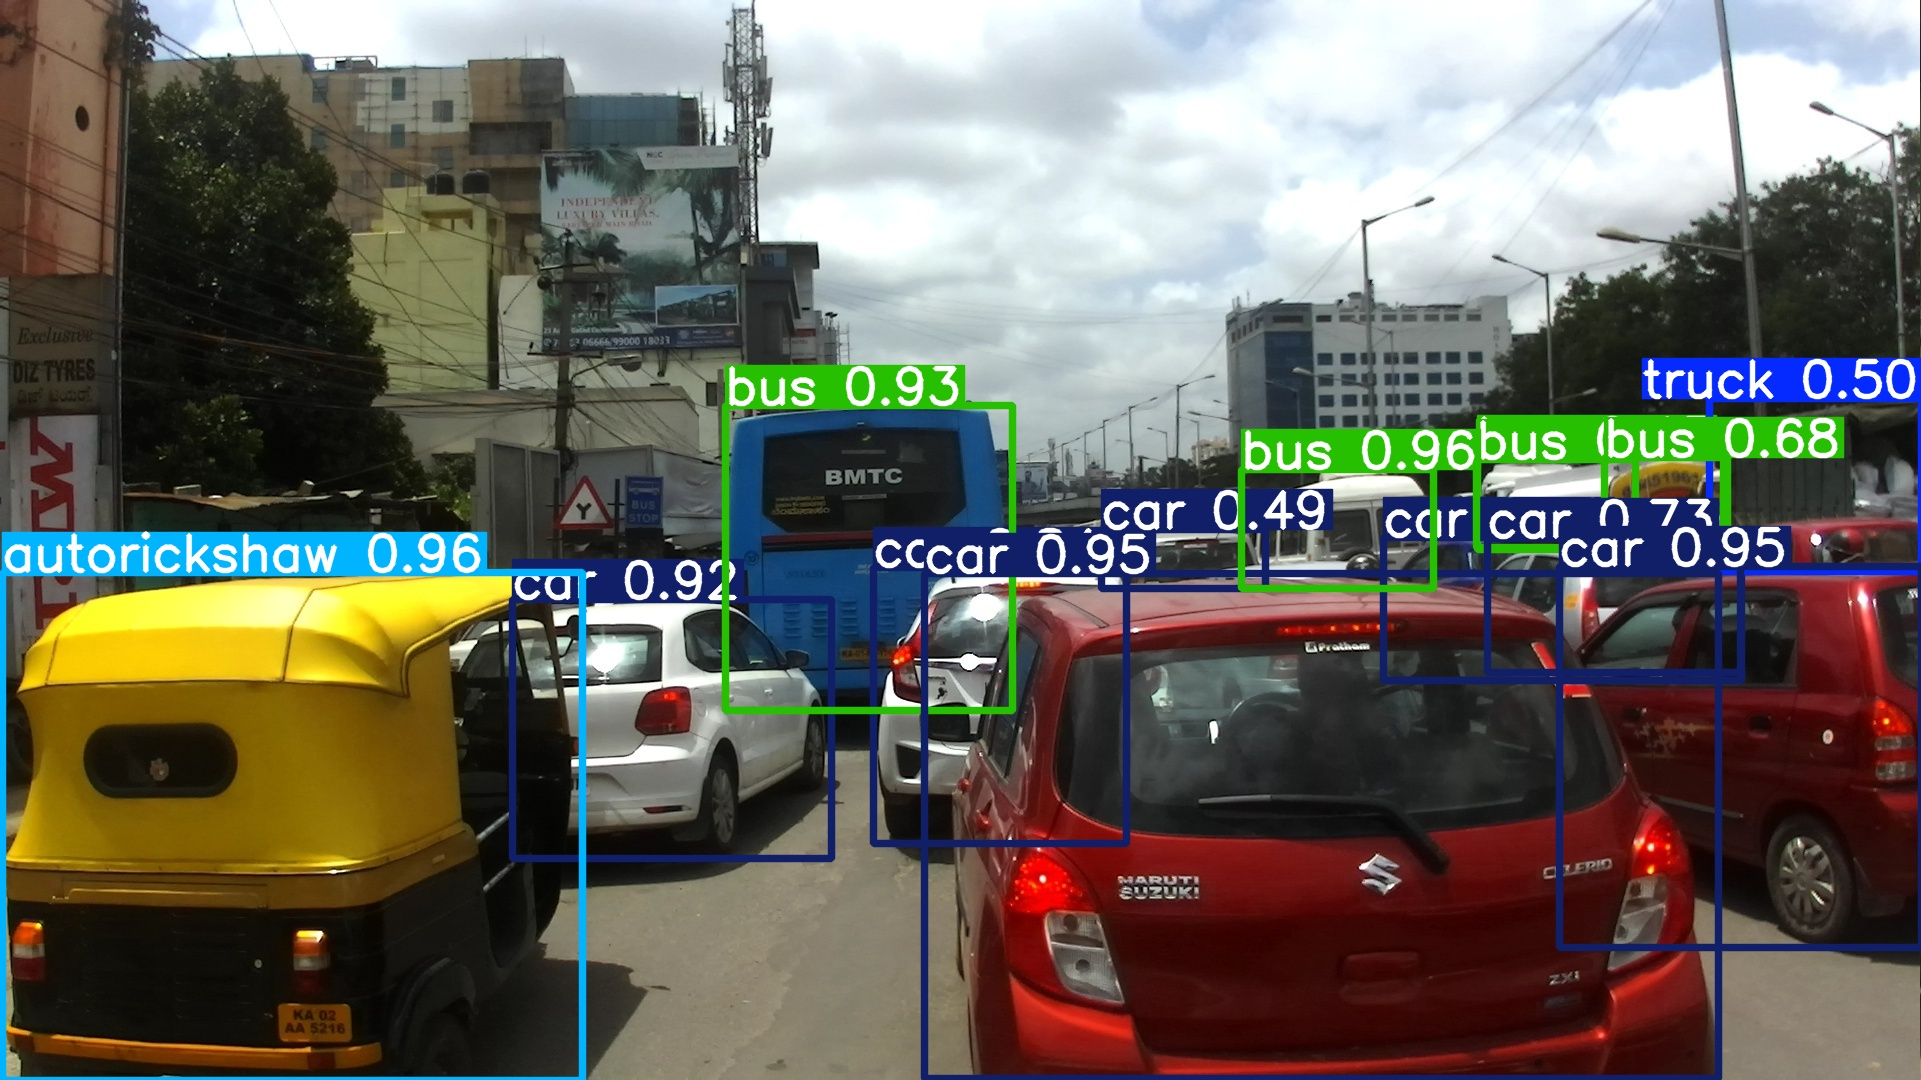

In [7]:
# Run detection on a sample image
img_path = "/kaggle/input/vehicle-dataset/output/val/images/0000009.jpg"
results = model.predict(source=img_path, conf=0.4, save=True)

# Show detected image
output_img = os.path.join(results[0].save_dir, os.path.basename(img_path))
display(Image(filename=output_img))


In [8]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.109 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/input/vehicle-dataset/output/val/labels... 3449 images, 42 backgrounds, 1 corrupt: 100%|██████████| 3449/3449 [00:03<00:00, 1081.40it/s]

val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0004247.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0007776.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0008384.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/vehicle-dataset/output/val/images/0017291.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.4723      1.3486]
val: WARNING ⚠️ Cache directory /kaggle/input/vehicle-dataset/output/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [00:33<00:00,  6.35it/s]


                   all       3448      66049      0.616       0.21       0.42      0.309
                 truck       1815       3959      0.726      0.292      0.515      0.405
                person       2138       9617      0.834      0.218      0.532      0.347
                 rider       2702      15100       0.88      0.301      0.601      0.396
                   car       2732      14281       0.91      0.388       0.66      0.525
            motorcycle       2826      14737      0.892      0.377      0.646      0.432
                animal        133        337      0.917     0.0326      0.475      0.375
               bicycle        169        199      0.619     0.0653      0.344        0.2
               caravan          5          6          0          0          0          0
          autorickshaw       1777       5111      0.851      0.444      0.668      0.533
                 train          6          6          0          0          0          0
                   bu

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train23
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  9, 10, 11, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad64ddf0590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,

In [9]:
import shutil

# Save image
shutil.copy(output_img, 'detected_vehicle.jpg')

# Zip outputs if needed
shutil.make_archive('vehicle_detection_output', 'zip', results[0].save_dir)


'/kaggle/working/vehicle_detection_output.zip'

In [10]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.predict('/kaggle/input/vehicle-dataset/output/val/images/0000009.jpg')



image 1/1 /kaggle/input/vehicle-dataset/output/val/images/0000009.jpg: 384x640 8 cars, 3 buss, 2 trucks, 18.0ms
Speed: 2.3ms preprocess, 18.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [11]:
import shutil

# Copy to root directory for download
shutil.copy("/kaggle/working/runs/detect/train/weights/best.pt", "/kaggle/working/best_model.pt")

# You can now download `best_model.pt` from the Kaggle "Files" tab


'/kaggle/working/best_model.pt'